In [3]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [73]:
# Import the csv file
lab = pd.read_csv("Lab 6 Exp 4 Aluminum Rod.csv")

In [73]:
# Save the data into time and temp variables
# Cut out the inital data(first 100 points) 
# where the thermoprobe is just getting warmed up
time = lab["Latest: Time (min)"][100:-1]
temp = lab["Latest: Temperature (°C)"][100:-1]

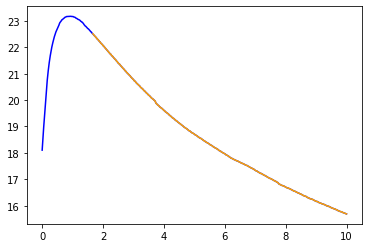

In [73]:
# Plot the data where the orange line is the data
# being used in the fit after cutting out the data
plt.plot(lab["Latest: Time (min)"], lab["Latest: Temperature (°C)"], color='blue')
plt.plot(time, temp, color ='orange')

In [74]:
# Model with a few additional variables to help
# fit the data
def model_al(x, v, T0=24, t0=0, c=0):
    x = np.array(x) + t0
    return (4*T0/np.pi)* np.exp(-v*x/2) + c

In [78]:
# fit the data using some initial parameters
pov, cov = opt.curve_fit(model_al, time, temp, [.25, 24, 0, 0], maxfev = 100000)
v, T, t, c = pov
y = model_al(time, v, T, t, c)
print(f"Gamma: {v}")
print(f"Initial Temp: {T}")
print(f"Time Offset: {t}")
print(f"Temp Offset: {c}")

Gamma: 0.31372750885034023
Initial Temp: 6.429981404786842
Time Offset: -2.4461157026847955
Temp Offset: 13.260315484422021


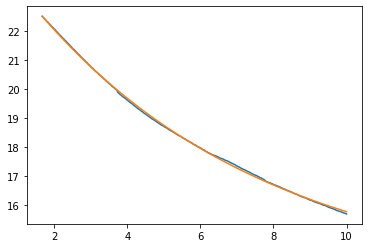

In [76]:
# Plot the fitted curve
plt.plot(time, np.array(temp))
plt.plot(time, y)
plt.show()